In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
income=pd.read_csv("/content/drive/MyDrive/income_(2).csv")
income

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


Text(0, 0.5, 'Income($)')

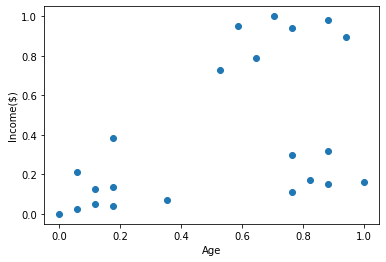

In [ ]:
plt.scatter(income['Age'],income['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income($)")

In [ ]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(income[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [ ]:
income['cluster']=y_predicted
income.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


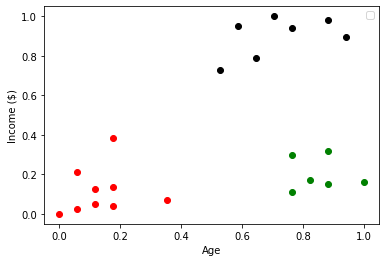

In [ ]:
df1=income[income.cluster==0]
df2=income[income.cluster==1]
df3=income[income.cluster==2]
plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='red')
plt.scatter(df3['Age'],df3['Income($)'],color='black')
#plt.scatter (km.cluster_centers_[:,0],km.clusters_centers_[:,1],color='purple',marker="*",label='centroid')
plt.xlabel("Age")
plt.ylabel("Income ($)")
plt.legend()

In [ ]:
# preprocessing using min max scaling


scaler=MinMaxScaler()
 
scaler.fit(income[["Income($)"]])
income['Income($)']=scaler.transform(income[['Income($)']])

scaler.fit(income[['Age']])
income['Age']=scaler.transform(income[['Age']])


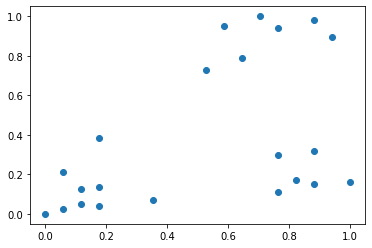

In [ ]:
plt.scatter(income['Age'],income['Income($)'])

In [ ]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(income[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [ ]:
income['cluster']=y_predicted
income.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [ ]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

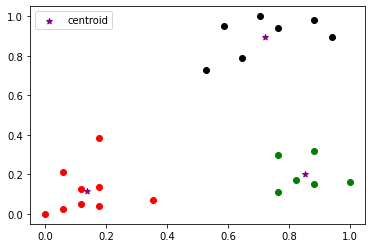

In [ ]:
df1=income[income.cluster==0]
df2=income[income.cluster==1]
df3=income[income.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [ ]:
# Elbow plot

sse=[]
k_rng=range(1,10)
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(income[['Age','Income($)']])
  sse.append(km.inertia_)

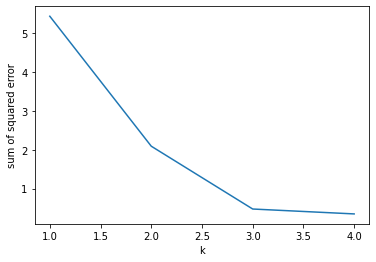

In [ ]:
plt.xlabel("k")
plt.ylabel("sum of squared error")
plt.plot(k_rng,sse)